In [65]:
import gym
import numpy as np
import ray
from gym import Env
from gym.spaces import Discrete, Box
from ray import tune, rllib, air
from ray.rllib.algorithms.ppo import PPOConfig
import matplotlib.pyplot as plt
from ray.tune.registry import register_env
from ray.rllib.utils.pre_checks.env import check_env

In [55]:
# define the custom routing grid environemnt
# observation_space
# action_space
# 0 - > move up
# 1 - > move down
# 2 - > move right
# 3 - > move left

class RtGridEnv(Env):
    def __init__(self, length, width):
        self.length = length
        self.width = width
        self.agent_position = (0,0)
        self.goal_position = (self.length - 1, self.width -1)

        self.action_space = Discrete(4)
        self.observation_space = Box(low=0, high=1, shape=(5, 5), dtype=int)

        self.path_x = []
        self.path_y = []

    def step(self, action):
        if action == 0:  # Up
            if (self.agent_position[1] + 1) <= self.width - 1: # if within the bound, then accept the move
                self.agent_position = (self.agent_position[0], self.agent_position[1] + 1)
        elif action == 1:  # Down
            if (self.agent_position[1] - 1) >= 0:
                self.agent_position = (self.agent_position[0], self.agent_position[1] - 1)
        elif action == 2:  # Right
            if (self.agent_position[0] + 1) <= self.length - 1:
                self.agent_position = (self.agent_position[0] + 1, self.agent_position[1])
        elif action == 3:  # Left
            if (self.agent_position[0] - 1) >= 0:
                self.agent_position = (self.agent_position[0] - 1, self.agent_position[1])

        done = self.agent_position == self.goal_position
        reward = 10 if done else -1

        # Update the agent's path
        self.path_x.append(self.agent_position[0])  
        self.path_y.append(self.agent_position[1])  

        return self.agent_position, reward, done, {}
    
    def render(self):
        # Plot the agent's path
        print(self.path_x)
        print(self.path_y)
        plt.plot(self.path_x, self.path_y, 'r')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Agent Path')
        plt.show()

    def reset(self):
        self.agent_position = (0,0)
        self.path_x = []
        self.path_y = []
        return self.agent_position

episode: 0
obs: (1, 0), reward: -1, done: False
episode: 0
obs: (2, 0), reward: -2, done: False
episode: 0
obs: (3, 0), reward: -3, done: False
episode: 0
obs: (2, 0), reward: -4, done: False
episode: 0
obs: (2, 0), reward: -5, done: False
episode: 0
obs: (2, 1), reward: -6, done: False
episode: 0
obs: (3, 1), reward: -7, done: False
episode: 0
obs: (3, 2), reward: -8, done: False
episode: 0
obs: (4, 2), reward: -9, done: False
episode: 0
obs: (4, 1), reward: -10, done: False
episode: 0
obs: (4, 0), reward: -11, done: False
episode: 0
obs: (4, 1), reward: -12, done: False
episode: 0
obs: (3, 1), reward: -13, done: False
episode: 0
obs: (2, 1), reward: -14, done: False
episode: 0
obs: (3, 1), reward: -15, done: False
episode: 0
obs: (2, 1), reward: -16, done: False
episode: 0
obs: (1, 1), reward: -17, done: False
episode: 0
obs: (1, 0), reward: -18, done: False
episode: 0
obs: (1, 0), reward: -19, done: False
episode: 0
obs: (0, 0), reward: -20, done: False
episode: 0
obs: (1, 0), rewar

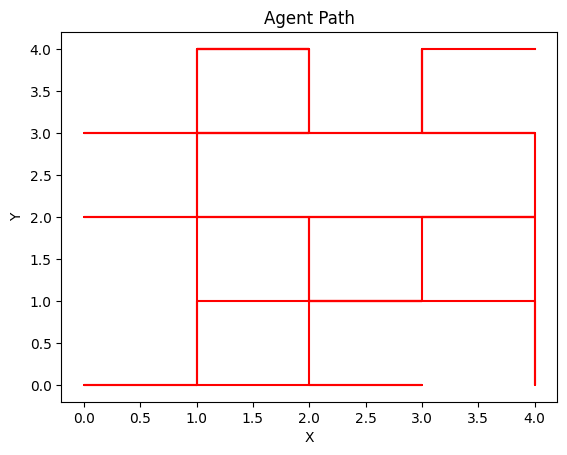

episode: 1
obs: (1, 0), reward: -1, done: False
episode: 1
obs: (1, 0), reward: -2, done: False
episode: 1
obs: (2, 0), reward: -3, done: False
episode: 1
obs: (1, 0), reward: -4, done: False
episode: 1
obs: (1, 1), reward: -5, done: False
episode: 1
obs: (0, 1), reward: -6, done: False
episode: 1
obs: (1, 1), reward: -7, done: False
episode: 1
obs: (0, 1), reward: -8, done: False
episode: 1
obs: (1, 1), reward: -9, done: False
episode: 1
obs: (1, 2), reward: -10, done: False
episode: 1
obs: (1, 1), reward: -11, done: False
episode: 1
obs: (0, 1), reward: -12, done: False
episode: 1
obs: (0, 1), reward: -13, done: False
episode: 1
obs: (1, 1), reward: -14, done: False
episode: 1
obs: (2, 1), reward: -15, done: False
episode: 1
obs: (3, 1), reward: -16, done: False
episode: 1
obs: (3, 0), reward: -17, done: False
episode: 1
obs: (3, 0), reward: -18, done: False
episode: 1
obs: (2, 0), reward: -19, done: False
episode: 1
obs: (1, 0), reward: -20, done: False
episode: 1
obs: (0, 0), rewar

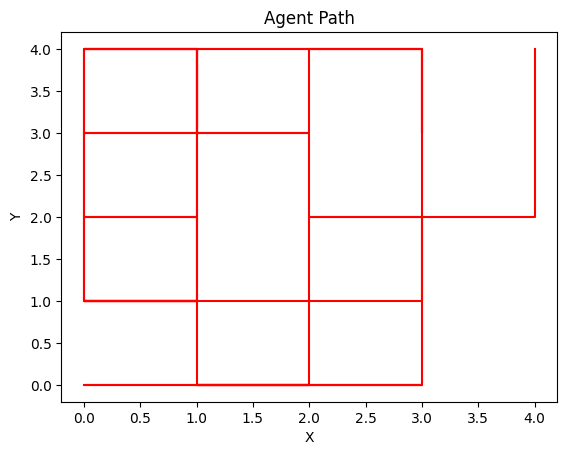

episode: 2
obs: (0, 0), reward: -1, done: False
episode: 2
obs: (0, 1), reward: -2, done: False
episode: 2
obs: (0, 0), reward: -3, done: False
episode: 2
obs: (0, 1), reward: -4, done: False
episode: 2
obs: (0, 2), reward: -5, done: False
episode: 2
obs: (1, 2), reward: -6, done: False
episode: 2
obs: (2, 2), reward: -7, done: False
episode: 2
obs: (2, 3), reward: -8, done: False
episode: 2
obs: (2, 2), reward: -9, done: False
episode: 2
obs: (2, 3), reward: -10, done: False
episode: 2
obs: (2, 2), reward: -11, done: False
episode: 2
obs: (2, 3), reward: -12, done: False
episode: 2
obs: (2, 4), reward: -13, done: False
episode: 2
obs: (1, 4), reward: -14, done: False
episode: 2
obs: (1, 3), reward: -15, done: False
episode: 2
obs: (1, 4), reward: -16, done: False
episode: 2
obs: (1, 4), reward: -17, done: False
episode: 2
obs: (0, 4), reward: -18, done: False
episode: 2
obs: (1, 4), reward: -19, done: False
episode: 2
obs: (1, 4), reward: -20, done: False
episode: 2
obs: (1, 4), rewar

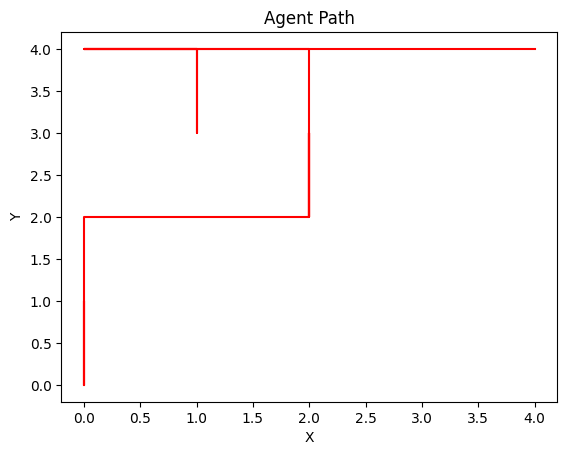

episode: 3
obs: (0, 0), reward: -1, done: False
episode: 3
obs: (1, 0), reward: -2, done: False
episode: 3
obs: (1, 0), reward: -3, done: False
episode: 3
obs: (2, 0), reward: -4, done: False
episode: 3
obs: (1, 0), reward: -5, done: False
episode: 3
obs: (0, 0), reward: -6, done: False
episode: 3
obs: (0, 0), reward: -7, done: False
episode: 3
obs: (0, 0), reward: -8, done: False
episode: 3
obs: (1, 0), reward: -9, done: False
episode: 3
obs: (1, 0), reward: -10, done: False
episode: 3
obs: (2, 0), reward: -11, done: False
episode: 3
obs: (2, 1), reward: -12, done: False
episode: 3
obs: (3, 1), reward: -13, done: False
episode: 3
obs: (4, 1), reward: -14, done: False
episode: 3
obs: (3, 1), reward: -15, done: False
episode: 3
obs: (4, 1), reward: -16, done: False
episode: 3
obs: (4, 0), reward: -17, done: False
episode: 3
obs: (4, 0), reward: -18, done: False
episode: 3
obs: (4, 1), reward: -19, done: False
episode: 3
obs: (4, 1), reward: -20, done: False
episode: 3
obs: (4, 1), rewar

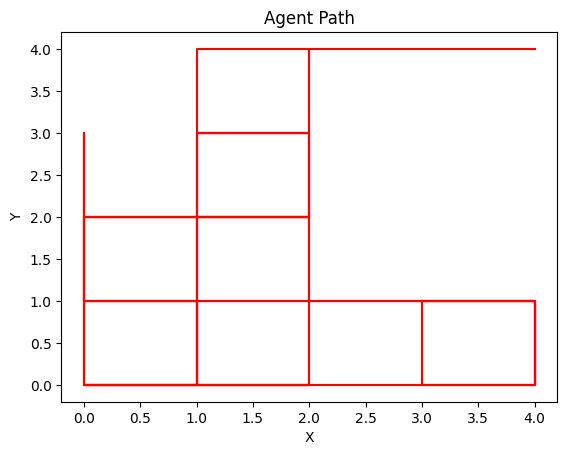

episode: 4
obs: (0, 0), reward: -1, done: False
episode: 4
obs: (0, 1), reward: -2, done: False
episode: 4
obs: (1, 1), reward: -3, done: False
episode: 4
obs: (0, 1), reward: -4, done: False
episode: 4
obs: (1, 1), reward: -5, done: False
episode: 4
obs: (2, 1), reward: -6, done: False
episode: 4
obs: (1, 1), reward: -7, done: False
episode: 4
obs: (0, 1), reward: -8, done: False
episode: 4
obs: (0, 2), reward: -9, done: False
episode: 4
obs: (1, 2), reward: -10, done: False
episode: 4
obs: (1, 1), reward: -11, done: False
episode: 4
obs: (2, 1), reward: -12, done: False
episode: 4
obs: (2, 2), reward: -13, done: False
episode: 4
obs: (1, 2), reward: -14, done: False
episode: 4
obs: (2, 2), reward: -15, done: False
episode: 4
obs: (2, 3), reward: -16, done: False
episode: 4
obs: (1, 3), reward: -17, done: False
episode: 4
obs: (2, 3), reward: -18, done: False
episode: 4
obs: (1, 3), reward: -19, done: False
episode: 4
obs: (1, 4), reward: -20, done: False
episode: 4
obs: (2, 4), rewar

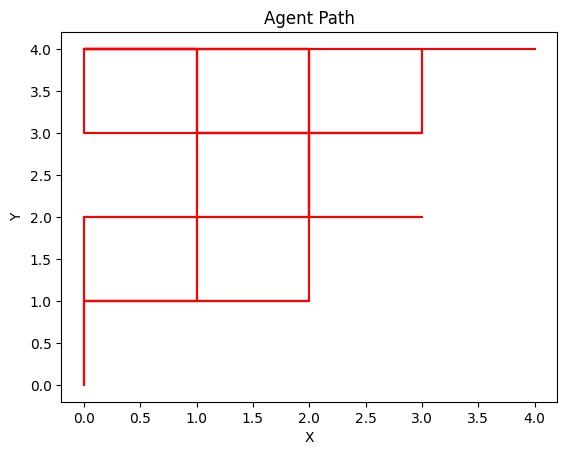

episode: 5
obs: (0, 0), reward: -1, done: False
episode: 5
obs: (0, 0), reward: -2, done: False
episode: 5
obs: (1, 0), reward: -3, done: False
episode: 5
obs: (1, 1), reward: -4, done: False
episode: 5
obs: (2, 1), reward: -5, done: False
episode: 5
obs: (2, 0), reward: -6, done: False
episode: 5
obs: (2, 0), reward: -7, done: False
episode: 5
obs: (2, 0), reward: -8, done: False
episode: 5
obs: (1, 0), reward: -9, done: False
episode: 5
obs: (1, 1), reward: -10, done: False
episode: 5
obs: (1, 2), reward: -11, done: False
episode: 5
obs: (2, 2), reward: -12, done: False
episode: 5
obs: (2, 1), reward: -13, done: False
episode: 5
obs: (2, 0), reward: -14, done: False
episode: 5
obs: (1, 0), reward: -15, done: False
episode: 5
obs: (1, 0), reward: -16, done: False
episode: 5
obs: (0, 0), reward: -17, done: False
episode: 5
obs: (1, 0), reward: -18, done: False
episode: 5
obs: (2, 0), reward: -19, done: False
episode: 5
obs: (2, 1), reward: -20, done: False
episode: 5
obs: (2, 0), rewar

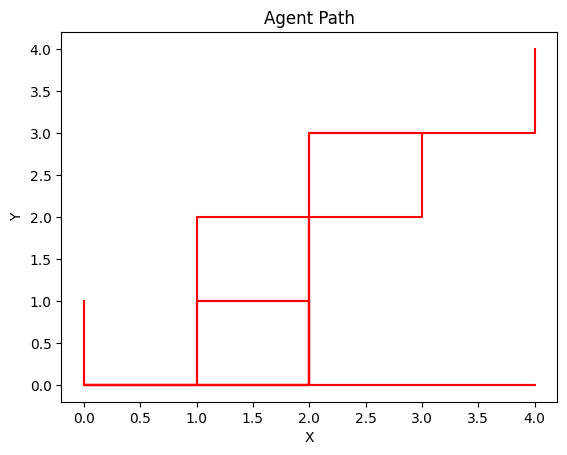

episode: 6
obs: (1, 0), reward: -1, done: False
episode: 6
obs: (1, 0), reward: -2, done: False
episode: 6
obs: (1, 1), reward: -3, done: False
episode: 6
obs: (1, 2), reward: -4, done: False
episode: 6
obs: (1, 1), reward: -5, done: False
episode: 6
obs: (1, 0), reward: -6, done: False
episode: 6
obs: (2, 0), reward: -7, done: False
episode: 6
obs: (2, 1), reward: -8, done: False
episode: 6
obs: (2, 2), reward: -9, done: False
episode: 6
obs: (2, 3), reward: -10, done: False
episode: 6
obs: (1, 3), reward: -11, done: False
episode: 6
obs: (2, 3), reward: -12, done: False
episode: 6
obs: (2, 4), reward: -13, done: False
episode: 6
obs: (2, 4), reward: -14, done: False
episode: 6
obs: (2, 3), reward: -15, done: False
episode: 6
obs: (3, 3), reward: -16, done: False
episode: 6
obs: (2, 3), reward: -17, done: False
episode: 6
obs: (2, 2), reward: -18, done: False
episode: 6
obs: (2, 3), reward: -19, done: False
episode: 6
obs: (2, 2), reward: -20, done: False
episode: 6
obs: (2, 1), rewar

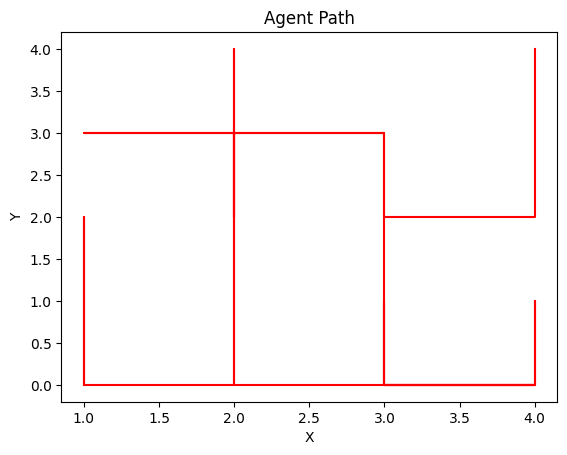

episode: 7
obs: (1, 0), reward: -1, done: False
episode: 7
obs: (1, 0), reward: -2, done: False
episode: 7
obs: (2, 0), reward: -3, done: False
episode: 7
obs: (1, 0), reward: -4, done: False
episode: 7
obs: (1, 0), reward: -5, done: False
episode: 7
obs: (1, 1), reward: -6, done: False
episode: 7
obs: (0, 1), reward: -7, done: False
episode: 7
obs: (0, 1), reward: -8, done: False
episode: 7
obs: (0, 2), reward: -9, done: False
episode: 7
obs: (0, 1), reward: -10, done: False
episode: 7
obs: (1, 1), reward: -11, done: False
episode: 7
obs: (0, 1), reward: -12, done: False
episode: 7
obs: (1, 1), reward: -13, done: False
episode: 7
obs: (1, 0), reward: -14, done: False
episode: 7
obs: (2, 0), reward: -15, done: False
episode: 7
obs: (2, 1), reward: -16, done: False
episode: 7
obs: (2, 0), reward: -17, done: False
episode: 7
obs: (2, 1), reward: -18, done: False
episode: 7
obs: (1, 1), reward: -19, done: False
episode: 7
obs: (1, 2), reward: -20, done: False
episode: 7
obs: (2, 2), rewar

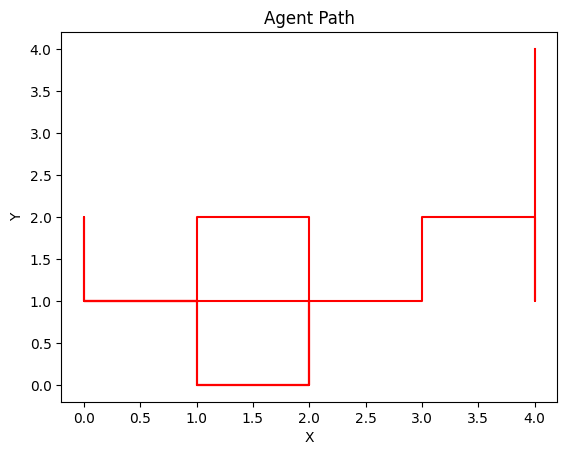

episode: 8
obs: (0, 0), reward: -1, done: False
episode: 8
obs: (0, 0), reward: -2, done: False
episode: 8
obs: (0, 0), reward: -3, done: False
episode: 8
obs: (0, 0), reward: -4, done: False
episode: 8
obs: (0, 1), reward: -5, done: False
episode: 8
obs: (0, 0), reward: -6, done: False
episode: 8
obs: (0, 0), reward: -7, done: False
episode: 8
obs: (0, 0), reward: -8, done: False
episode: 8
obs: (1, 0), reward: -9, done: False
episode: 8
obs: (0, 0), reward: -10, done: False
episode: 8
obs: (0, 0), reward: -11, done: False
episode: 8
obs: (0, 0), reward: -12, done: False
episode: 8
obs: (0, 1), reward: -13, done: False
episode: 8
obs: (1, 1), reward: -14, done: False
episode: 8
obs: (0, 1), reward: -15, done: False
episode: 8
obs: (1, 1), reward: -16, done: False
episode: 8
obs: (1, 0), reward: -17, done: False
episode: 8
obs: (0, 0), reward: -18, done: False
episode: 8
obs: (0, 0), reward: -19, done: False
episode: 8
obs: (1, 0), reward: -20, done: False
episode: 8
obs: (0, 0), rewar

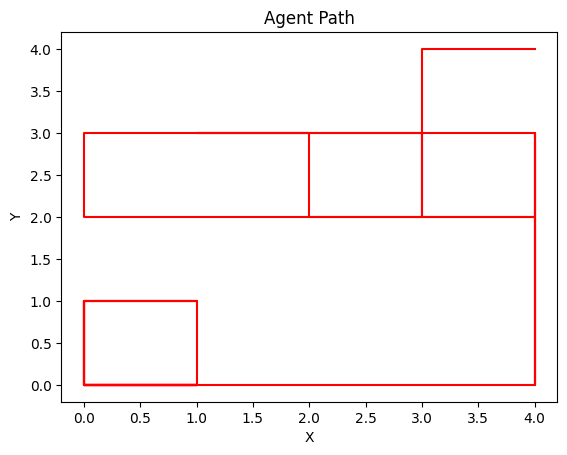

episode: 9
obs: (0, 0), reward: -1, done: False
episode: 9
obs: (0, 1), reward: -2, done: False
episode: 9
obs: (0, 2), reward: -3, done: False
episode: 9
obs: (0, 1), reward: -4, done: False
episode: 9
obs: (1, 1), reward: -5, done: False
episode: 9
obs: (1, 0), reward: -6, done: False
episode: 9
obs: (1, 0), reward: -7, done: False
episode: 9
obs: (2, 0), reward: -8, done: False
episode: 9
obs: (3, 0), reward: -9, done: False
episode: 9
obs: (2, 0), reward: -10, done: False
episode: 9
obs: (1, 0), reward: -11, done: False
episode: 9
obs: (1, 1), reward: -12, done: False
episode: 9
obs: (1, 2), reward: -13, done: False
episode: 9
obs: (1, 3), reward: -14, done: False
episode: 9
obs: (0, 3), reward: -15, done: False
episode: 9
obs: (0, 4), reward: -16, done: False
episode: 9
obs: (0, 4), reward: -17, done: False
episode: 9
obs: (0, 4), reward: -18, done: False
episode: 9
obs: (1, 4), reward: -19, done: False
episode: 9
obs: (1, 4), reward: -20, done: False
episode: 9
obs: (0, 4), rewar

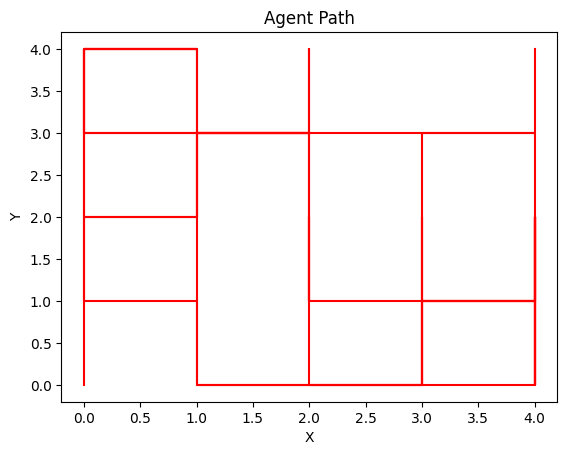

episode: 10
obs: (0, 1), reward: -1, done: False
episode: 10
obs: (1, 1), reward: -2, done: False
episode: 10
obs: (1, 2), reward: -3, done: False
episode: 10
obs: (1, 1), reward: -4, done: False
episode: 10
obs: (2, 1), reward: -5, done: False
episode: 10
obs: (2, 2), reward: -6, done: False
episode: 10
obs: (3, 2), reward: -7, done: False
episode: 10
obs: (4, 2), reward: -8, done: False
episode: 10
obs: (4, 2), reward: -9, done: False
episode: 10
obs: (4, 2), reward: -10, done: False
episode: 10
obs: (4, 3), reward: -11, done: False
episode: 10
obs: (4, 3), reward: -12, done: False
episode: 10
obs: (4, 2), reward: -13, done: False
episode: 10
obs: (4, 2), reward: -14, done: False
episode: 10
obs: (4, 1), reward: -15, done: False
episode: 10
obs: (4, 1), reward: -16, done: False
episode: 10
obs: (4, 1), reward: -17, done: False
episode: 10
obs: (4, 1), reward: -18, done: False
episode: 10
obs: (3, 1), reward: -19, done: False
episode: 10
obs: (3, 0), reward: -20, done: False
episode: 

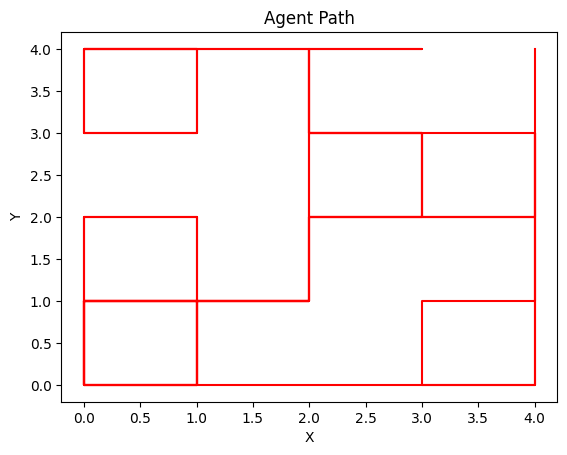

episode: 11
obs: (0, 0), reward: -1, done: False
episode: 11
obs: (0, 0), reward: -2, done: False
episode: 11
obs: (0, 1), reward: -3, done: False
episode: 11
obs: (0, 0), reward: -4, done: False
episode: 11
obs: (0, 0), reward: -5, done: False
episode: 11
obs: (0, 0), reward: -6, done: False
episode: 11
obs: (1, 0), reward: -7, done: False
episode: 11
obs: (1, 0), reward: -8, done: False
episode: 11
obs: (2, 0), reward: -9, done: False
episode: 11
obs: (1, 0), reward: -10, done: False
episode: 11
obs: (2, 0), reward: -11, done: False
episode: 11
obs: (3, 0), reward: -12, done: False
episode: 11
obs: (2, 0), reward: -13, done: False
episode: 11
obs: (2, 1), reward: -14, done: False
episode: 11
obs: (2, 2), reward: -15, done: False
episode: 11
obs: (1, 2), reward: -16, done: False
episode: 11
obs: (2, 2), reward: -17, done: False
episode: 11
obs: (3, 2), reward: -18, done: False
episode: 11
obs: (3, 3), reward: -19, done: False
episode: 11
obs: (3, 4), reward: -20, done: False
episode: 

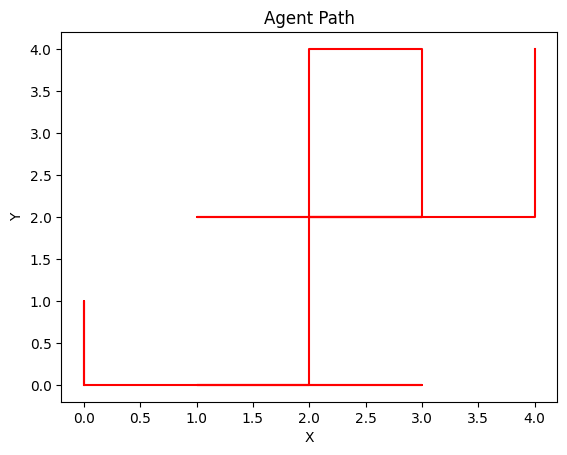

episode: 12
obs: (0, 0), reward: -1, done: False
episode: 12
obs: (0, 0), reward: -2, done: False
episode: 12
obs: (0, 0), reward: -3, done: False
episode: 12
obs: (0, 0), reward: -4, done: False
episode: 12
obs: (0, 0), reward: -5, done: False
episode: 12
obs: (0, 1), reward: -6, done: False
episode: 12
obs: (1, 1), reward: -7, done: False
episode: 12
obs: (1, 2), reward: -8, done: False
episode: 12
obs: (1, 3), reward: -9, done: False
episode: 12
obs: (1, 4), reward: -10, done: False
episode: 12
obs: (1, 4), reward: -11, done: False
episode: 12
obs: (0, 4), reward: -12, done: False
episode: 12
obs: (0, 4), reward: -13, done: False
episode: 12
obs: (1, 4), reward: -14, done: False
episode: 12
obs: (1, 4), reward: -15, done: False
episode: 12
obs: (0, 4), reward: -16, done: False
episode: 12
obs: (0, 4), reward: -17, done: False
episode: 12
obs: (0, 3), reward: -18, done: False
episode: 12
obs: (0, 4), reward: -19, done: False
episode: 12
obs: (0, 4), reward: -20, done: False
episode: 

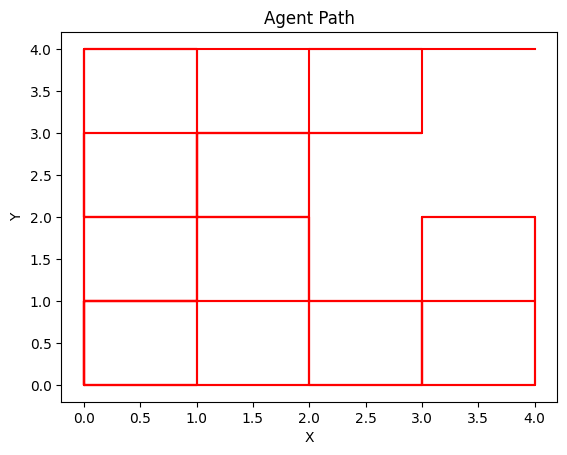

episode: 13
obs: (1, 0), reward: -1, done: False
episode: 13
obs: (1, 1), reward: -2, done: False
episode: 13
obs: (1, 2), reward: -3, done: False
episode: 13
obs: (1, 1), reward: -4, done: False
episode: 13
obs: (1, 0), reward: -5, done: False
episode: 13
obs: (2, 0), reward: -6, done: False
episode: 13
obs: (3, 0), reward: -7, done: False
episode: 13
obs: (4, 0), reward: -8, done: False
episode: 13
obs: (4, 1), reward: -9, done: False
episode: 13
obs: (3, 1), reward: -10, done: False
episode: 13
obs: (3, 2), reward: -11, done: False
episode: 13
obs: (3, 3), reward: -12, done: False
episode: 13
obs: (3, 2), reward: -13, done: False
episode: 13
obs: (2, 2), reward: -14, done: False
episode: 13
obs: (2, 3), reward: -15, done: False
episode: 13
obs: (2, 2), reward: -16, done: False
episode: 13
obs: (1, 2), reward: -17, done: False
episode: 13
obs: (0, 2), reward: -18, done: False
episode: 13
obs: (0, 2), reward: -19, done: False
episode: 13
obs: (1, 2), reward: -20, done: False
episode: 

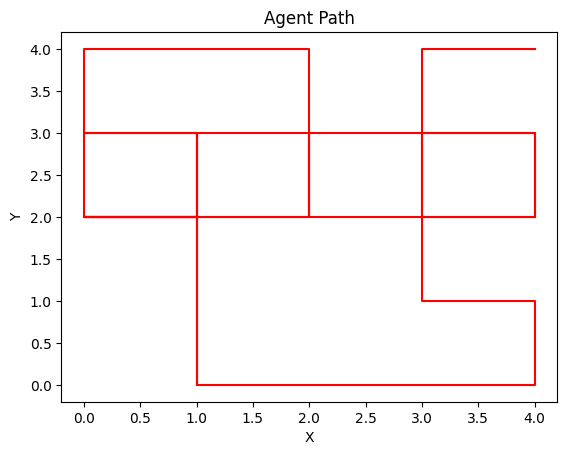

episode: 14
obs: (0, 0), reward: -1, done: False
episode: 14
obs: (0, 0), reward: -2, done: False
episode: 14
obs: (0, 0), reward: -3, done: False
episode: 14
obs: (0, 1), reward: -4, done: False
episode: 14
obs: (0, 1), reward: -5, done: False
episode: 14
obs: (1, 1), reward: -6, done: False
episode: 14
obs: (2, 1), reward: -7, done: False
episode: 14
obs: (2, 2), reward: -8, done: False
episode: 14
obs: (2, 3), reward: -9, done: False
episode: 14
obs: (3, 3), reward: -10, done: False
episode: 14
obs: (3, 4), reward: -11, done: False
episode: 14
obs: (4, 4), reward: -1, done: True
[0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 3, 4]
[0, 0, 0, 1, 1, 1, 1, 2, 3, 3, 4, 4]


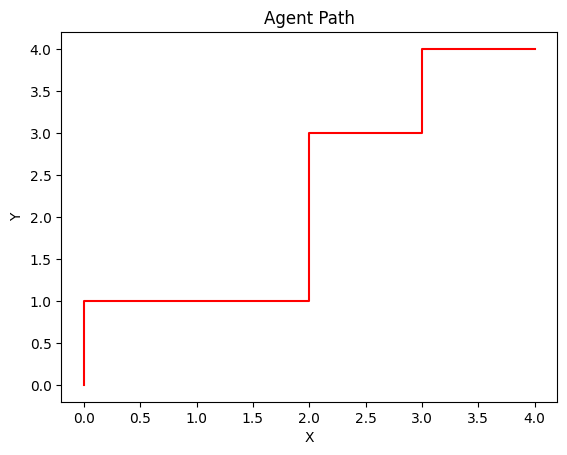

episode: 15
obs: (1, 0), reward: -1, done: False
episode: 15
obs: (2, 0), reward: -2, done: False
episode: 15
obs: (2, 1), reward: -3, done: False
episode: 15
obs: (2, 0), reward: -4, done: False
episode: 15
obs: (1, 0), reward: -5, done: False
episode: 15
obs: (1, 0), reward: -6, done: False
episode: 15
obs: (2, 0), reward: -7, done: False
episode: 15
obs: (2, 0), reward: -8, done: False
episode: 15
obs: (2, 0), reward: -9, done: False
episode: 15
obs: (2, 1), reward: -10, done: False
episode: 15
obs: (1, 1), reward: -11, done: False
episode: 15
obs: (1, 2), reward: -12, done: False
episode: 15
obs: (1, 1), reward: -13, done: False
episode: 15
obs: (0, 1), reward: -14, done: False
episode: 15
obs: (0, 0), reward: -15, done: False
episode: 15
obs: (1, 0), reward: -16, done: False
episode: 15
obs: (2, 0), reward: -17, done: False
episode: 15
obs: (2, 0), reward: -18, done: False
episode: 15
obs: (1, 0), reward: -19, done: False
episode: 15
obs: (0, 0), reward: -20, done: False
episode: 

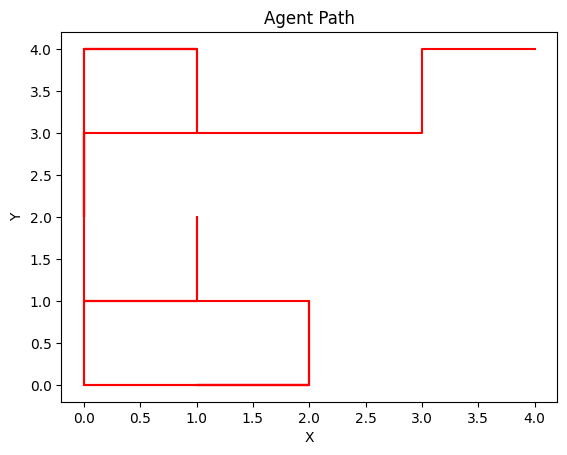

episode: 16
obs: (0, 0), reward: -1, done: False
episode: 16
obs: (0, 0), reward: -2, done: False
episode: 16
obs: (0, 1), reward: -3, done: False
episode: 16
obs: (0, 0), reward: -4, done: False
episode: 16
obs: (0, 0), reward: -5, done: False
episode: 16
obs: (1, 0), reward: -6, done: False
episode: 16
obs: (0, 0), reward: -7, done: False
episode: 16
obs: (0, 1), reward: -8, done: False
episode: 16
obs: (1, 1), reward: -9, done: False
episode: 16
obs: (1, 0), reward: -10, done: False
episode: 16
obs: (1, 1), reward: -11, done: False
episode: 16
obs: (1, 2), reward: -12, done: False
episode: 16
obs: (0, 2), reward: -13, done: False
episode: 16
obs: (0, 2), reward: -14, done: False
episode: 16
obs: (0, 1), reward: -15, done: False
episode: 16
obs: (0, 2), reward: -16, done: False
episode: 16
obs: (0, 2), reward: -17, done: False
episode: 16
obs: (0, 1), reward: -18, done: False
episode: 16
obs: (1, 1), reward: -19, done: False
episode: 16
obs: (1, 2), reward: -20, done: False
episode: 

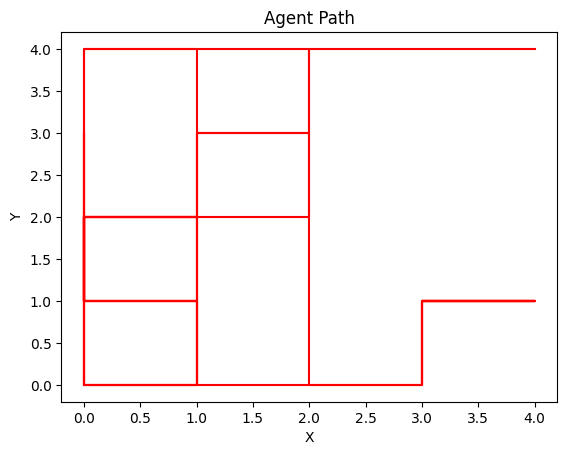

episode: 17
obs: (0, 0), reward: -1, done: False
episode: 17
obs: (1, 0), reward: -2, done: False
episode: 17
obs: (1, 1), reward: -3, done: False
episode: 17
obs: (2, 1), reward: -4, done: False
episode: 17
obs: (3, 1), reward: -5, done: False
episode: 17
obs: (3, 2), reward: -6, done: False
episode: 17
obs: (3, 3), reward: -7, done: False
episode: 17
obs: (3, 2), reward: -8, done: False
episode: 17
obs: (3, 1), reward: -9, done: False
episode: 17
obs: (4, 1), reward: -10, done: False
episode: 17
obs: (4, 2), reward: -11, done: False
episode: 17
obs: (4, 2), reward: -12, done: False
episode: 17
obs: (3, 2), reward: -13, done: False
episode: 17
obs: (4, 2), reward: -14, done: False
episode: 17
obs: (4, 2), reward: -15, done: False
episode: 17
obs: (3, 2), reward: -16, done: False
episode: 17
obs: (2, 2), reward: -17, done: False
episode: 17
obs: (1, 2), reward: -18, done: False
episode: 17
obs: (1, 3), reward: -19, done: False
episode: 17
obs: (2, 3), reward: -20, done: False
episode: 

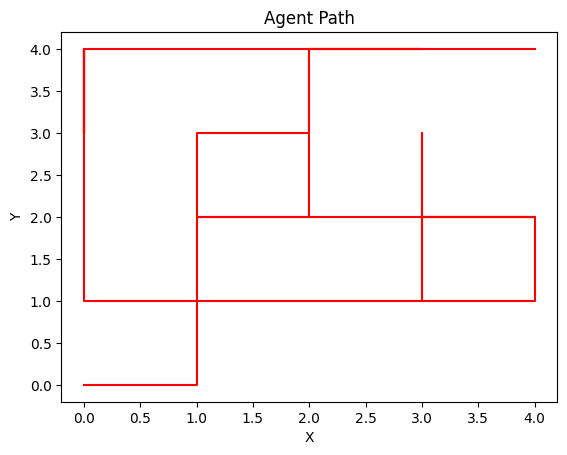

episode: 18
obs: (0, 0), reward: -1, done: False
episode: 18
obs: (0, 0), reward: -2, done: False
episode: 18
obs: (0, 0), reward: -3, done: False
episode: 18
obs: (1, 0), reward: -4, done: False
episode: 18
obs: (0, 0), reward: -5, done: False
episode: 18
obs: (1, 0), reward: -6, done: False
episode: 18
obs: (1, 1), reward: -7, done: False
episode: 18
obs: (0, 1), reward: -8, done: False
episode: 18
obs: (1, 1), reward: -9, done: False
episode: 18
obs: (1, 0), reward: -10, done: False
episode: 18
obs: (2, 0), reward: -11, done: False
episode: 18
obs: (3, 0), reward: -12, done: False
episode: 18
obs: (3, 1), reward: -13, done: False
episode: 18
obs: (4, 1), reward: -14, done: False
episode: 18
obs: (4, 2), reward: -15, done: False
episode: 18
obs: (3, 2), reward: -16, done: False
episode: 18
obs: (3, 1), reward: -17, done: False
episode: 18
obs: (2, 1), reward: -18, done: False
episode: 18
obs: (1, 1), reward: -19, done: False
episode: 18
obs: (2, 1), reward: -20, done: False
episode: 

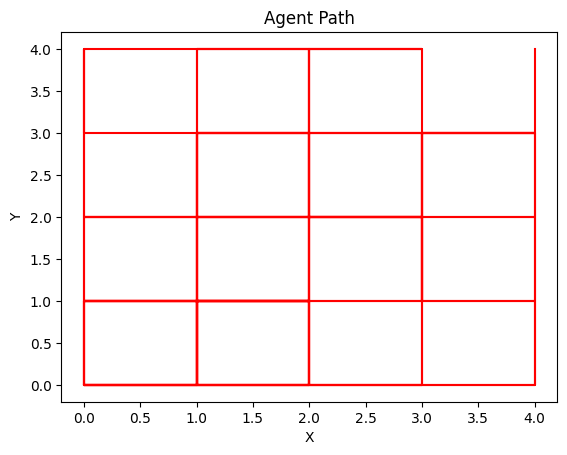

episode: 19
obs: (0, 1), reward: -1, done: False
episode: 19
obs: (0, 2), reward: -2, done: False
episode: 19
obs: (1, 2), reward: -3, done: False
episode: 19
obs: (2, 2), reward: -4, done: False
episode: 19
obs: (2, 1), reward: -5, done: False
episode: 19
obs: (1, 1), reward: -6, done: False
episode: 19
obs: (1, 2), reward: -7, done: False
episode: 19
obs: (0, 2), reward: -8, done: False
episode: 19
obs: (0, 2), reward: -9, done: False
episode: 19
obs: (0, 2), reward: -10, done: False
episode: 19
obs: (0, 1), reward: -11, done: False
episode: 19
obs: (0, 2), reward: -12, done: False
episode: 19
obs: (0, 2), reward: -13, done: False
episode: 19
obs: (0, 3), reward: -14, done: False
episode: 19
obs: (1, 3), reward: -15, done: False
episode: 19
obs: (1, 2), reward: -16, done: False
episode: 19
obs: (1, 3), reward: -17, done: False
episode: 19
obs: (1, 4), reward: -18, done: False
episode: 19
obs: (2, 4), reward: -19, done: False
episode: 19
obs: (2, 3), reward: -20, done: False
episode: 

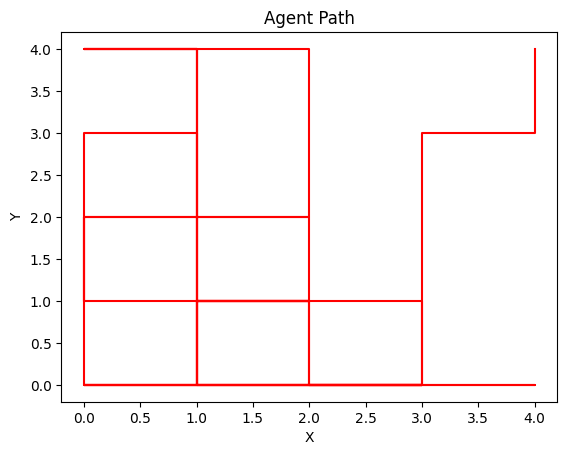

In [60]:
# check the environment
env = RtGridEnv(5,5)
num_episodes = 20

for ep in range(num_episodes):
    total_reward = 0
    obs = env.reset()
    done = False
    while True:
        action = env.action_space.sample()
        new_obs, reward, done, info = env.step(action)
        total_reward += reward
            
        print(f"episode: {ep}")
        print(f"obs: {new_obs}, reward: {total_reward}, done: {done}")

        if done:
            break
    
    env.render()

In [62]:
# calculate the environment baseline
num_episodes = 3000
num_timesteps = 0
episode_rewards = []

for ep in range(num_episodes):
    obs = env.reset()
    done = False
    episode_reward = 0.0

    while True:
        action = env.action_space.sample()
        new_obs, reward, done, info = env.step(action)
        episode_reward += reward
        num_timesteps += 1

        if done:
            episode_rewards.append(episode_reward)
            break

# calculate mean_reward
env_mean_random_reward = np.mean(episode_rewards)
env_sd_reward = np.std(episode_rewards)
# calculate number of wins
total_reward = np.sum(episode_rewards)

print()
print("**************")
print(f"Baseline Mean Reward={env_mean_random_reward:.2f}+/-{env_sd_reward:.2f}", end="")
print()
print(f"Baseline won {total_reward} times over {num_episodes} episodes ({num_timesteps} timesteps)")
print(f"Approx {total_reward/num_episodes:.2f} wins per episode")
print("**************")


**************
Baseline Mean Reward=-94.29+/-90.30
Baseline won -282882.0 times over 3000 episodes (315882 timesteps)
Approx -94.29 wins per episode
**************


In [67]:
# configure and build the algorithm
register_env("routing_grid_env", lambda config: RtGridEnv(5,5))

print("checking environment ...")
try:
    check_env(env)
    print("All checks passed. No errors found.")
except:
    print("failed")

config = (PPOConfig()
          .environment("routing_grid_env")
          .rollouts(num_rollout_workers=2)
          .evaluation(evaluation_interval=15, evaluation_duration=5, evaluation_num_workers=1)
)
algo = config.build()

checking environment ...
failed


(RolloutWorker pid=15570) 2023-06-13 21:55:38,508	WARNING env.py:147 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.
(RolloutWorker pid=15570) /home/brucexi2/anaconda3/lib/python3.10/site-packages/gym/spaces/box.py:142: UserWarning: WARN: Casting input x to numpy array.
(RolloutWorker pid=15570)   logger.warn("Casting input x to numpy array.")
(RolloutWorker pid=15571) /home/brucexi2/anaconda3/lib/python3.10/site-packages/gym/spaces/box.py:142: UserWarning: WARN: Casting input x to numpy array.
(RolloutWorker pid=15571)   logger.warn("Casting input x to numpy array.")
(RolloutWorker pid=15571) 2023-06-13 21:55:38,485	ERROR worker.py:763 -- Exception raised in creation task: The actor died because of an error raised in its creation task, ray::RolloutWorker.__init__() (pid=15571, ip=192.168.

ValueError: Traceback (most recent call last):
  File "/home/brucexi2/.local/lib/python3.10/site-packages/tree/__init__.py", line 284, in assert_same_structure
    _tree.assert_same_structure(a, b, check_types)
ValueError: The two structures don't have the same nested structure.

First structure: type=tuple str=(0, 0)

Second structure: type=ndarray str=[[1 1 1 1 1]
 [1 1 1 0 0]
 [1 1 0 0 0]
 [1 1 1 1 0]
 [0 1 1 1 1]]

More specifically: Substructure "type=tuple str=(0, 0)" is a sequence, while substructure "type=ndarray str=[[1 1 1 1 1]
 [1 1 1 0 0]
 [1 1 0 0 0]
 [1 1 1 1 0]
 [0 1 1 1 1]]" is not

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/brucexi2/anaconda3/lib/python3.10/site-packages/ray/rllib/utils/pre_checks/env.py", line 77, in check_env
    check_gym_environments(env)
  File "/home/brucexi2/anaconda3/lib/python3.10/site-packages/ray/rllib/utils/pre_checks/env.py", line 175, in check_gym_environments
    temp_sampled_reset_obs = convert_element_to_space_type(
  File "/home/brucexi2/anaconda3/lib/python3.10/site-packages/ray/rllib/utils/spaces/space_utils.py", line 359, in convert_element_to_space_type
    return tree.map_structure(map_, element, sampled_element, check_types=False)
  File "/home/brucexi2/.local/lib/python3.10/site-packages/tree/__init__.py", line 433, in map_structure
    assert_same_structure(structures[0], other, check_types=check_types)
  File "/home/brucexi2/.local/lib/python3.10/site-packages/tree/__init__.py", line 288, in assert_same_structure
    raise type(e)("%s\n"
ValueError: The two structures don't have the same nested structure.

First structure: type=tuple str=(0, 0)

Second structure: type=ndarray str=[[1 1 1 1 1]
 [1 1 1 0 0]
 [1 1 0 0 0]
 [1 1 1 1 0]
 [0 1 1 1 1]]

More specifically: Substructure "type=tuple str=(0, 0)" is a sequence, while substructure "type=ndarray str=[[1 1 1 1 1]
 [1 1 1 0 0]
 [1 1 0 0 0]
 [1 1 1 1 0]
 [0 1 1 1 1]]" is not
Entire first structure:
(., .)
Entire second structure:
.

The above error has been found in your environment! We've added a module for checking your custom environments. It may cause your experiment to fail if your environment is not set up correctly. You can disable this behavior by setting `disable_env_checking=True` in your environment config dictionary. You can run the environment checking module standalone by calling ray.rllib.utils.check_env([env]).